<a href="https://colab.research.google.com/github/LeeJaeEun0/Study_for_miniproject/blob/main/mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Load Models

In [ ]:
facenet= cv2.dnn.readNet('/content/drive/MyDrive/model/deploy.prototxt.txt', '/content/drive/MyDrive/model/res10_300x300_ssd_iter_140000.caffemodel')
model = load_model('/content/drive/MyDrive/model/mask_detector.model')

# Load Image

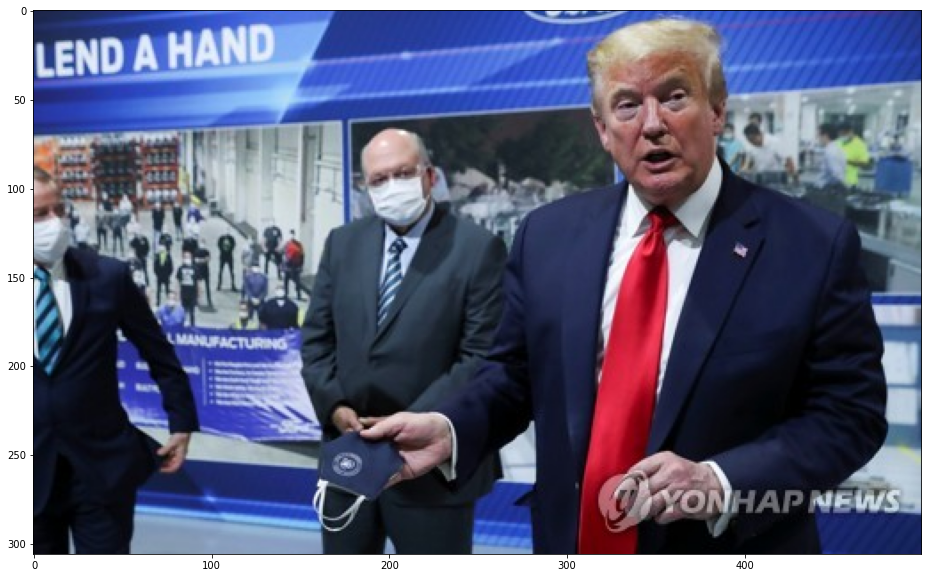

In [ ]:
img = cv2.imread('/content/drive/MyDrive/imgs/02.jpg')
h, w = img.shape[:2] # 이미지의 높이와 너비를 저장

plt.figure(figsize=(16, 10))
# opencv는 BGR의 순서로 읽어서 => RGB로 바꿔주기
plt.imshow(img[:, :, ::-1]) # 이미지가 잘 로드 되었는지 확인

# Preprocess Image for Face Detection
- 얼굴을 인식하고 얼굴을 잘라 마스크를 썼는지 확인하기

In [ ]:
# 학습시킨 모델의 파라미터 값에 따라서 입력 - 우리가 학습시킨다면 고쳐야 할 부분 
# cv2.dnn.blobFromImage()는 opencv를 dnn모듈이 사용하는 형태로 이미지를 변형, axis순서만 바뀜
blob = cv2.dnn.blobFromImage(img, scalefactor=1, size=(300,300), mean=(104., 177., 123.))
facenet.setInput(blob) # 모델에 인풋 데이터를 넣어준다
dets = facenet.forward() # 결과를 추론한다

# Detect Faces

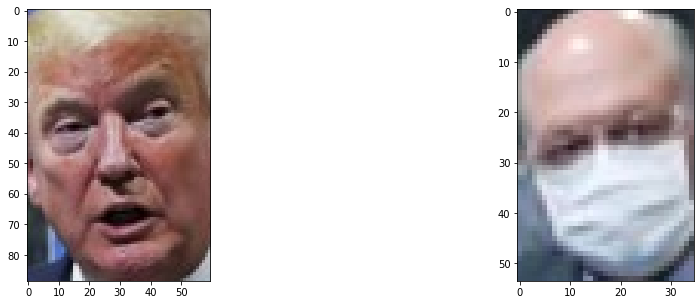

In [ ]:
faces=[]

for i in range(dets.shape[2]): # 얼굴이 여러개일 경우 대비
  confidence = dets[0,0, i,2] # detection의 결과가 얼마나 자신있는지를 확인
  if confidence < 0.5: # threshold: 한계점이 0.5보다 크면 넘어감
    continue
  
  # x와 y의 바운딩 박스 구하기
  x1 = int(dets[0,0,i,3] * w)
  y1 = int(dets[0,0,i,4] * h)
  x2 = int(dets[0,0,i,5] * w)
  y2 = int(dets[0,0,i,6] * h)

  # 바운딩 박스에서 얼굴을 자름
  face = img[y1:y2, x1:x2]
  faces.append(face) # 자른 얼굴들을 저장

plt.figure(figsize=(16,5)) # 출력할 사이즈 지정

for i, face in enumerate(faces): # 저장이 잘됐는지를 확인
  plt.subplot(1, len(faces), i+1)
  plt.imshow(face[:,:,::-1]) # 이미지 출력하기


# Detect Masks from Faces

1/1 [==============================] - 0s 152ms/step


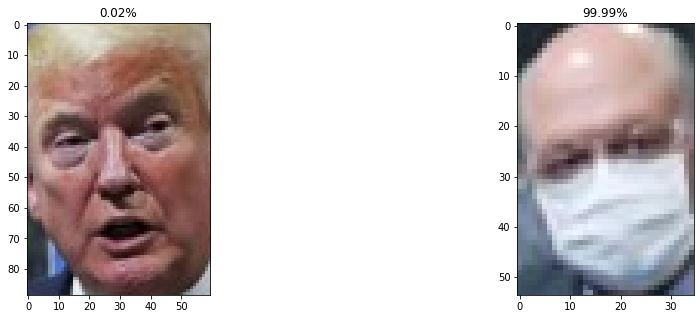

In [ ]:
plt.figure(figsize=(16, 5))

for i, face in enumerate(faces): # 마스크를 썼는지 안썼는지 예측 
  # 전처리하는 부분
  face_input = cv2.resize(face, dsize=(224, 224)) 
  face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB) # BGR => RGB # 이미지의 컬러시스템 변경
  face_input = preprocess_input(face_input) 
  face_input = np.expand_dims(face_input, axis=0) # 차원추가  # (224,224,3) => (1, 224, 224, 3) 이미지 넣기 위해

  # 미리 불러온 모델에 예측값을 넣기 -  마스크를 쓴 확률, 마스크를 쓰지 않은 확률
  mask, nomask= model.predict(face_input).squeeze()

  plt.subplot(1, len(faces), i+1)
  plt.imshow(face[:,:,::-1])
  plt.title("%.2f%%" % (mask * 100)) # 마스크를 쓴 확률을 title로 출력


## 비디오.py에 비디오로 만드는 방법 있음